<a href="https://colab.research.google.com/github/howard-haowen/NLP-demos/blob/main/texthero_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
!pip install -U -q pip setuptools wheel
!pip install -U -q spacy
!python -m spacy download en_core_web_md

In [2]:
#@title
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_md')

# Tokenize texts

In [3]:
text = "I'd like to order three Cheeseburgers and one small fries."
doc = nlp(text)
for tok in doc:
    print(tok.text, tok.pos_, sep="|")

I|PRON
'd|AUX
like|VERB
to|PART
order|VERB
three|NUM
Cheeseburgers|NOUN
and|CCONJ
one|NUM
small|ADJ
fries|NOUN
.|PUNCT


# Parse dependency relationships

In [4]:
Robot = "What would you like to order?"
Human = "I'd like to order three Cheeseburgers and one small fries."
doc = nlp(Human)
displacy.render(doc, style='dep',jupyter=True)

In [5]:
for token in doc:
    if token.dep_ == "dobj":
        children_of_dobj = [t.i for t in token.children]
        left_most_idx = min(children_of_dobj)
        right_most_idx = max(children_of_dobj)
        order = doc[left_most_idx:right_most_idx+1].text
        print(f"Robot: Your order is {order}. Is that correct?")

Robot: Your order is three Cheeseburgers and one small fries. Is that correct?


# Calculate text similarity

> Feel free to change `text_1` and `text_2` to other English texts. Then rerun the following cell.

In [6]:
text_1 = "I'm a big fan of foreign tongues."
text_2 = "I'm interested in learning languges."
doc_1 = nlp(text_1)
doc_2 = nlp(text_2)
sim_score = doc_1.similarity(doc_2)
sim_score

0.8357480426963773

- Cosine similarity

![](https://www.tyrrell4innovation.ca/wp-content/uploads/2021/06/rsz_jenny_du_miword.png)

In [7]:
#@title
!pip install texthero -U -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 2.3.7 which is incompatible.
en-core-web-md 3.3.0 requires spacy<3.4.0,>=3.3.0.dev0, but you have spacy 2.3.7 which is incompatible.


In [8]:
#@title
import pandas as pd
import texthero as hero
pd.options.plotting.backend = "plotly"

# Analyze multiple texts

In [9]:
df = pd.read_csv(
   "https://github.com/jbesomi/texthero/raw/master/dataset/bbcsport.csv"
)
df

,text,topic
0,Claxton hunting first major medal\n\nBritish h...,athletics
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics
2,Greene sets sights on world title\n\nMaurice G...,athletics
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics
...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis
733,Mauresmo fights back to win title\n\nWorld num...,tennis
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis
735,GB players warned over security\n\nBritain's D...,tennis


In [10]:
df['topic'].value_counts().plot.bar()

> Feel free to change `TOPIC` to any of `football`, `rugby`, `criket`, `athletics`, `tennis`, and rerun the cell.

In [11]:
TOPIC = 'tennis'
filt = df['topic'] == TOPIC
sample_text = df[filt].sample(1).iloc[0, 0]
sample_text

'Almagro continues Spanish surge\n\nUnseeded Nicolas Almagro became the fifth Spaniard to reach the last eight at the Buenos Aires Open, ousting eighth seed Mariano Zabaleta.\n\nHe showed admirable resolve to win a rain-affected match 6-7 6-4 6-4. Compatriot and seventh seed Rafael Nadal also reached the last eight, beating Italian Potito Starace 6-1 6-3. Nadal, playing in the outdoor clay event for the first time, hit some powerful forehands to oust Starace in a match delayed over an hour by rain. "It\'s always a problem to have to stop for rain but one gets used to it," said Spanish teenager Nadal. "Luckily, I was able to keep my pace going throughout the match." He will now play Gaston Gaudio, who beat unseeded Brazilian Flavio Saretta 6-3 6-2 in the day\'s late match.\n'

# Clean texts

In [12]:
df['clean_text'] = hero.clean(df['text'])
df

,text,topic,clean_text
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...


> Feel free to change `TOPIC` to any of `football`, `rugby`, `criket`, `athletics`, `tennis`, and rerun the cell.

In [13]:
TOPIC = 'tennis'
filt = df['topic'] == TOPIC
sample = df[filt].sample(1)
raw_text = sample.iloc[0, 0]
clean_text = sample.iloc[0, 2]
print('Before cleaning >>>')
print(raw_text)
print('After cleaning >>>')
print(clean_text)

Before cleaning >>>
Big guns ease through in San Jose

Top-seeded Americans Andy Roddick and Andre Agassi survived minor scares to reach the last eight of the SAP Open.

Agassi endured early problems against left-handed Dane Kenneth Carlsen before sealing a 7-5 6-1 victory. And world number three Roddick dropped a set to Korean player Hyung-Taik Lee, before pulling out a 6-3 3-6 6-2 win in San Jose, California. Seventh seed Jurgen Melzer came through 6-3 6-3 against Xavier Malisse - winner in Delray Beach last week. Frenchman Cyril Saulnier, meanwhile, fired 19 aces to secure a 6-1 7-6 win over Czech qualifier Tomas Zib.

Roddick broke a racket in frustration in the third game of the second set. and afterwards was unimpressed with his form. "I'm not playing great," he said. "But I'm through and I'm going to keep battling. "A lot of people are under the assumption that it's easy to play well every week and it's not." It is the 12th time in 13 appearances at the event that Agassi, now 34

**Common preprocessing operations**

- Lowercase all texts
- Remove digits
- Remove punctuations
- Remove diacritics
- Remove whitespaces
- Remove stopwords


**Examples of stopwords**

![](https://www.computerhope.com/jargon/s/stop-words.png)

# Show top words per topic

> Feel free to change `NUM_TOP_WORDS` to other intergers.

In [14]:
NUM_TOP_WORDS = 10
df.groupby('topic')['clean_text'].apply(lambda x: hero.top_words(x)[:NUM_TOP_WORDS])

topic               
athletics  said         181
           world        160
           year         159
           olympic      137
           race         112
           athens        99
           champion      99
           indoor        96
           european      94
           time          83
cricket    test         232
           england      225
           first        219
           cricket      216
           one          212
           said         203
           day          203
           series       169
           australia    144
           south        143
football   said         475
           chelsea      305
           game         297
           would        287
           club         274
           arsenal      247
           united       246
           players      240
           league       237
           time         220
rugby      england      395
           said         262
           wales        247
           ireland      229
           rugby        223

# Vectorize texts

![](https://miro.medium.com/max/1000/1*vWWmJlDykVRkjg9c38VbxQ.png)

- To convert a document into number, we'll need the Document-Term Matrix (DTM).
![](https://rlads2021.github.io/LabBook/assets/img/dtm.png)

In [15]:
df['tfidf'] = hero.tfidf(df['clean_text'])
df

,text,topic,clean_text,tfidf
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Train a clustering model

K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between 

1. assigning data points to clusters based on the current centroids 
2. chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

till convergence..

![](https://i.imgur.com/42n9uvR.png)

In [16]:
#@title
from sklearn.cluster import KMeans

In [17]:
NUM_CLUSTERS = 5
doc_term_matrix = df['tfidf'].to_list()
km = KMeans(
    n_clusters=NUM_CLUSTERS, 
    max_iter=10000, 
    random_state=123,
    ).fit(doc_term_matrix)

In [18]:
df['cluster'] = km.labels_
df

,text,topic,clean_text,tfidf,cluster
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",0
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


# Reduce dimensions

- **Principal Component Analysis** (PCA) is a common technique for reducing dimensions.

![](https://miro.medium.com/max/1400/1*mgncZaKaVx9U6OCQu_m8Bg.jpeg)

In [19]:
df['pca'] = hero.pca(df['tfidf'])
df

,text,topic,clean_text,tfidf,cluster,pca
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09104737738246123, 0.10349124188213515]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,"[-0.0004008037310292736, 0.02483296499025852]"
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",0,"[-0.11762440044199468, 0.12860906745187917]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09135454327393087, 0.15398723568825426]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-0.09127308355122186, 0.13496571208797117]"
...,...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.06661329716459279, 0.10871820241186834]"
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.0481120495170056, 0.0529343128365336]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.04971862809652683, 0.06018639006501553]"
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,"[-0.048762565907180894, 0.0138328192715864]"


# Visualize texts

In [20]:
#@title
import plotly.express as px

In [21]:
#@title
df['pca_0'] = df['pca'].apply(lambda x: x[0])
df['pca_1'] = df['pca'].apply(lambda x: x[1])

In [22]:
fig = px.scatter(df, x="pca_0", y="pca_1", 
                 color="topic",
                 title="PCA BBC Sport news labelled by topics",
                 hover_name=df.index,)
fig.show()

In [23]:
fig = px.scatter(df, x="pca_0", y="pca_1", 
                 color="cluster",
                 title="PCA BBC Sport news labelled by clusters",
                 hover_name=df.index,)
fig.show()

# Extract named entities

> Feel free to change `DOCID` to any number between 0 and 736.

In [24]:
DOCID = 400
text = df.loc[DOCID, 'text']
doc = nlp(text)
displacy.render(doc, style='ent',jupyter=True)

**Types of named entities** 

- PERSON: People, including fictional.

- NORP: Nationalities or religious or political groups.

- FAC: Buildings, airports, highways, bridges, etc.

- ORG : Companies, agencies, institutions, etc.

- GPE: Countries, cities, states.

- LOC: Non-GPE locations, mountain ranges, bodies of water.

- PRODUCT: Objects, vehicles, foods, etc. (Not services.)

- EVENT: Named hurricanes, battles, wars, sports events, etc.

- WORK_OF_ART: Titles of books, songs, etc.

- LAW: Named documents made into laws.

- LANGUAGE: Any named language.

- DATE: Absolute or relative dates or periods.

- TIME: Times smaller than a day.

- PERCENT: Percentage, including ”%“.

- MONEY: Monetary values, including unit.

- QUANTITY: Measurements, as of weight or distance.

- ORDINAL: “first”, “second”, etc.

- CARDINAL: Numerals that do not fall under another type.

In [25]:
df['named_entities'] = hero.named_entities(df['text'])

/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning:

[W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.



In [26]:
df

,text,topic,clean_text,tfidf,cluster,pca,pca_0,pca_1,named_entities
0,Claxton hunting first major medal\n\nBritish h...,athletics,claxton hunting first major medal british hurd...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09104737738246123, 0.10349124188213515]",-0.091047,0.103491,"[(Claxton, ORG, 0, 7), (British, NORP, 35, 42)..."
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,sullivan could run worlds sonia sullivan indic...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,"[-0.0004008037310292736, 0.02483296499025852]",-0.000401,0.024833,"[(O'Sullivan, PERSON, 0, 10), (Worlds, GPE, 24..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,greene sets sights world title maurice greene ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0533678197008...",0,"[-0.11762440044199468, 0.12860906745187917]",-0.117624,0.128609,"[(Maurice Greene, PERSON, 35, 49), (Olympic 10..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,iaaf launches fight drugs iaaf athletics world...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.09135454327393087, 0.15398723568825426]",-0.091355,0.153987,"[(Two, CARDINAL, 182, 185), (IAAF, ORG, 505, 5..."
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,dibaba breaks 000m world record ethiopia tirun...,"[0.24734311047947527, 0.0, 0.0, 0.0, 0.0, 0.0,...",0,"[-0.09127308355122186, 0.13496571208797117]",-0.091273,0.134966,"[(Dibaba, GPE, 0, 6), (5,000, CARDINAL, 14, 19..."
...,...,...,...,...,...,...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,agassi second round dubai fourth seed andre ag...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.06661329716459279, 0.10871820241186834]",-0.066613,0.108718,"[(Agassi, GPE, 0, 6), (second, ORDINAL, 12, 18..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,mauresmo fights back win title world number tw...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.0481120495170056, 0.0529343128365336]",-0.048112,0.052934,"[(two, CARDINAL, 48, 51), (Amelie Mauresmo, PE..."
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,federer wins title rotterdam world number one ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,"[-0.04971862809652683, 0.06018639006501553]",-0.049719,0.060186,"[(Rotterdam\n\nWorld, FAC, 22, 38), (Roger Fed..."
735,GB players warned over security\n\nBritain's D...,tennis,gb players warned security britain davis cup p...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,"[-0.048762565907180894, 0.0138328192715864]",-0.048763,0.013833,"[(GB, GPE, 0, 2), (Britain, GPE, 33, 40), (Dav..."


In [27]:
#@title
def filter_ent(named_entities, ent_label):
    results = [e[0] for e in named_entities if e[1]==ent_label]
    results = list(set(results))
    return results

In [28]:
#@title
from collections import Counter

def show_top_entities(df, ent_label, top_k=10):
    corpus_ents = []
    for ents in df[ent_label]:
        corpus_ents.extend(ents)
    counter = Counter(corpus_ents)
    res = counter.most_common(top_k)
    return res

## Person

In [29]:
df['person'] = df['named_entities'].apply(filter_ent, args=('PERSON',))
cols = ['text', 'topic', 'person']
df[cols]

,text,topic,person
0,Claxton hunting first major medal\n\nBritish h...,athletics,[Sarah Claxton]
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[Maria McCambridge, Fionnualla Britton, O'Sull..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[Maurice Greene, Francis Obikwelu, Ato, Justin..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[Frankie Fredericks, Lamine Diack]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[Kluft, Jolanda Ceplak, Berhane Adera, Bekele,..."
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[Schuettler, Tommy Robredo, Andre Agassi, Greg..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[Venus Williams, Williams, Amelie Mauresmo]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[Ljubicic, Ivan Ljubicic, Roger Federer]"
735,GB players warned over security\n\nBritain's D...,tennis,"[Jeremy, Alex Bogdanovic, Greg Rusedski, Murra..."


> Feel free to change `TOP_K` to other numbers and rerun the cell.

In [30]:
TOP_K = 10
show_top_entities(df, 'person', top_k=TOP_K)

[('Alex Ferguson', 29),
 ('Andy Robinson', 27),
 ('Williams', 26),
 ('Jose Mourinho', 26),
 ('Jones', 24),
 ('Michael Vaughan', 24),
 ('Robinson', 22),
 ('Johnson', 21),
 ('Arsene Wenger', 21),
 ('Roger Federer', 21)]

In [31]:
df['person'].apply(len).plot()

In [32]:
max_person_text = df.loc[692, 'text']
print(max_person_text)

Henman to face Saulnier test

British number one Tim Henman will face France's Cyril Saulnier in the first round of next week's Australian Open.

Greg Rusedski, the British number two, is in the same quarter of the draw and could face Andy Roddick in the second round if he beats Swede Jonas Bjorkman. Local favourite Lleyton Hewitt will meet France's Arnaud Clement, while defending champion and world number one Roger Federer faces Fabrice Santoro. Women's top seed Lindsay Davenport drew Spanish veteran Conchita Martinez.

Henman came from two sets down to defeat Saulnier in the first round of the French Open last year, so he knows he faces a tough test in Melbourne. The seventh seed, who has never gone beyond the quarter-finals in the year's first major and is lined up to meet Roddick in the last eight, is looking forward to the match. "He's tough player on any surface, he's got a lot of ability," he said. "We had a really tight one in Paris that went my way so I'm going to need to play

## Geopolitical entities

In [33]:
df['gpe'] = df['named_entities'].apply(filter_ent, args=('GPE',))
cols = ['text', 'topic', 'gpe']
df[cols]

,text,topic,gpe
0,Claxton hunting first major medal\n\nBritish h...,athletics,"[London, Colchester, Madrid, Scotland]"
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,"[France, Dublin, Worlds, St Etienne, London, I..."
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[Britain, Finland, Kansas, Athens, Greece, Fra..."
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,"[Qatar, Monaco]"
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,"[Stuttgart, 7:39.89, Tirunesh Dibaba, Slovenia..."
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,"[Belgium, Morocco, Slovakia, the United Arab E..."
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[Dinara Safina, Antwerp]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,"[Doha, Rotterdam]"
735,GB players warned over security\n\nBritain's D...,tennis,"[Tel Aviv, GB, Britain, Israel]"


> Feel free to change `TOP_K` to other numbers and rerun the cell.

In [34]:
TOP_K = 10
show_top_entities(df, 'gpe', top_k=TOP_K)

[('England', 217),
 ('France', 110),
 ('Australia', 101),
 ('Ireland', 86),
 ('Scotland', 83),
 ('South Africa', 71),
 ('Wales', 66),
 ('New Zealand', 64),
 ('Italy', 56),
 ('Newcastle', 54)]

In [35]:
df['gpe'].apply(len).plot()

## Event

In [36]:
df['event'] = df['named_entities'].apply(filter_ent, args=('EVENT',))
cols = ['text', 'topic', 'event']
df[cols]

,text,topic,event
0,Claxton hunting first major medal\n\nBritish h...,athletics,[]
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...,athletics,[]
2,Greene sets sights on world title\n\nMaurice G...,athletics,"[Olympic, World Championship]"
3,IAAF launches fight against drugs\n\nThe IAAF ...,athletics,[]
4,"Dibaba breaks 5,000m world record\n\nEthiopia'...",athletics,[]
...,...,...,...
732,Agassi into second round in Dubai\n\nFourth se...,tennis,[]
733,Mauresmo fights back to win title\n\nWorld num...,tennis,"[the Paris Indoor Open, the Diamond Games]"
734,Federer wins title in Rotterdam\n\nWorld numbe...,tennis,[]
735,GB players warned over security\n\nBritain's D...,tennis,[]


In [37]:
TOP_K = 10
show_top_entities(df, 'event', top_k=TOP_K)

[('World Cup', 40),
 ('Olympic', 35),
 ('Olympics', 28),
 ('the World Cup', 24),
 ('Wimbledon', 22),
 ('the Six Nations', 17),
 ('the Carling Cup', 11),
 ('Cup', 10),
 ('Carling Cup', 9),
 ('the Davis Cup', 8)]

In [38]:
df['event'].apply(len).plot()

In [39]:
filt = df['event'].apply(len) == 5
cols = ['text', 'topic', 'event']
df[filt][cols]

,text,topic,event
33,"Athens memories soar above lows\n\nWell, it's ...",athletics,"[Olympics, Olympic, Games, the Beijing Olympic..."
65,Britain boosted by Holmes double\n\nAthletics ...,athletics,"[Olympic, Olympics, the 2004 Olympics, the Oly..."
570,A year to remember for Irish\n\nThere used to ...,rugby,"[the Six Nations under-21, Celtic Cup, the Wor..."
579,Wilkinson to lead England\n\nFly-half Jonny Wi...,rugby,"[Rugby World Cup, a World Cup, Six Nations Cha..."
711,Federer joins all-time greats\n\nThe last year...,tennis,"[Olympic, the Olympic Games, the Wimbledon and..."


# Draw a word cloud

In [40]:
#@title
def show_ent_wordcloud(ent_label):
    texts = df[ent_label].apply(lambda x: " ".join(x))
    hero.wordcloud(texts)

> Feel free to change `person` to `gpe` or `event`.

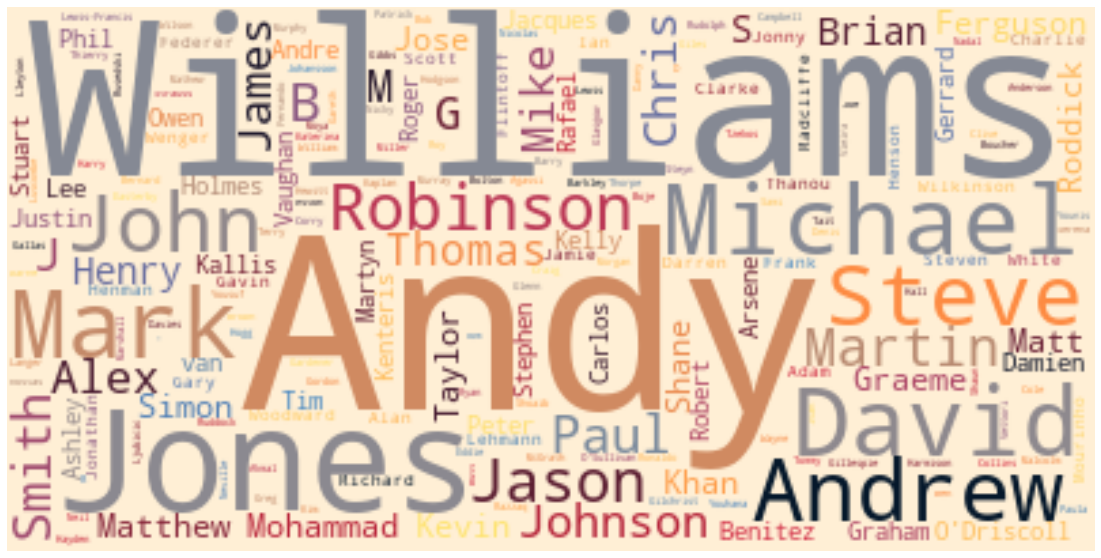

In [43]:
entity_label = 'person'
show_ent_wordcloud(entity_label)